In [11]:
from simulator import *

# Loan properties
PERIODS_PER_YEAR = 12
LOAN_DURATION_YEARS = 30
TOTAL_LOAN_PERIODS = PERIODS_PER_YEAR * LOAN_DURATION_YEARS
NOMINAL_ANNUAL_INTEREST_RATE = 6.19 / 100
LOAN_PRINCIPAL = 570000
PERIOD_INTEREST_RATE = NOMINAL_ANNUAL_INTEREST_RATE / PERIODS_PER_YEAR
PERIOD_PAYMENT = (LOAN_PRINCIPAL * (PERIOD_INTEREST_RATE * (1 + PERIOD_INTEREST_RATE) ** TOTAL_LOAN_PERIODS) /
                  ((1 + PERIOD_INTEREST_RATE) ** TOTAL_LOAN_PERIODS - 1))

def calculate_total_payments(metrics: MetricsContainer) -> float:
    return metrics["total_payments"] + PERIOD_PAYMENT

def calculate_interest_payment(metrics: MetricsContainer) -> float:
    return metrics["remaining_loan"] * PERIOD_INTEREST_RATE

def calculate_total_interest_paid(metrics: MetricsContainer) -> float:
    return metrics["total_interest_paid"] + calculate_interest_payment(metrics)

def calculate_principal_payment(metrics: MetricsContainer) -> float:
    return PERIOD_PAYMENT - calculate_interest_payment(metrics)

def calculate_remaining_loan(metrics: MetricsContainer) -> float:
    return metrics["remaining_loan"] - calculate_principal_payment(metrics)

loan_metric_configs = {
    "total_payments": MetricConfig(initial_value=0, period_calculator=calculate_total_payments),
    "interest_payment": MetricConfig(initial_value=None, period_calculator=calculate_interest_payment, plot=False),
    "total_interest_paid": MetricConfig(initial_value=0, period_calculator=calculate_total_interest_paid),
    "principal_payment": MetricConfig(initial_value=None, period_calculator=calculate_principal_payment, plot=False),
    "remaining_loan": MetricConfig(initial_value=LOAN_PRINCIPAL, period_calculator=calculate_remaining_loan)
}

In [12]:
# Property properties
DEPOSIT = 30000
ADDITIONAL_UPFRONT_COSTS = 0
ANNUAL_APPRECIATION_RATE = 7 / 100
INITIAL_PROPERTY_VALUE = LOAN_PRINCIPAL + DEPOSIT
PERIOD_APPRECIATION_RATE = (1 + ANNUAL_APPRECIATION_RATE) ** (1 / PERIODS_PER_YEAR) - 1

def calculate_period_appreciation(metrics: MetricsContainer) -> float:
    return metrics["property_value"] * (1 + PERIOD_APPRECIATION_RATE) - metrics["property_value"]

def calculate_property_value(metrics: MetricsContainer) -> float:
    return metrics["property_value"] + calculate_period_appreciation(metrics)

def calculate_equity(metrics: MetricsContainer) -> float:
    return metrics["equity"] + calculate_principal_payment(metrics) + calculate_period_appreciation(metrics)

property_metric_configs = {
    "property_value": MetricConfig(initial_value=INITIAL_PROPERTY_VALUE, period_calculator=calculate_property_value),
    "equity": MetricConfig(initial_value=DEPOSIT, period_calculator=calculate_equity)
}

In [13]:
# Income properties
INITIAL_ANNUAL_RENTAL_INCOME = 26000
RENTAL_INCOME_ANNUAL_GROWTH_RATE = 4 / 100
PERIOD_RENTAL_INCOME_GROWTH_RATE = (1 + RENTAL_INCOME_ANNUAL_GROWTH_RATE) ** (1 / PERIODS_PER_YEAR) - 1
INITIAL_PERIOD_RENTAL_INCOME = INITIAL_ANNUAL_RENTAL_INCOME / PERIODS_PER_YEAR

def calculate_period_rental_income(metrics: MetricsContainer) -> float:
    return metrics["period_rental_income"] * (1 + PERIOD_RENTAL_INCOME_GROWTH_RATE)

def calculate_total_rental_income(metrics: MetricsContainer) -> float:
    return metrics["total_rental_income"] + calculate_period_rental_income(metrics)

def calculate_period_cashflow(metrics: MetricsContainer) -> float:
    return calculate_period_rental_income(metrics) - calculate_interest_payment(metrics)

def calculate_net_worth(metrics: MetricsContainer) -> float:
    return metrics["net_worth"] + calculate_period_cashflow(metrics) + calculate_period_appreciation(metrics) + calculate_principal_payment(metrics)

income_metric_configs = {
    "period_rental_income": MetricConfig(initial_value=INITIAL_PERIOD_RENTAL_INCOME, period_calculator=calculate_period_rental_income, plot=False),
    "total_rental_income": MetricConfig(initial_value=0, period_calculator=calculate_total_rental_income),
    "period_cashflow": MetricConfig(initial_value=None, period_calculator=calculate_period_cashflow, plot=False),
    "net_worth": MetricConfig(initial_value=DEPOSIT - ADDITIONAL_UPFRONT_COSTS, period_calculator=calculate_net_worth),
}

In [14]:
# Baseline Properties
ETF_ANNUAL_YIELD = 10 / 100
ETF_PERIOD_YIELD = (1 + ETF_ANNUAL_YIELD) ** (1 / PERIODS_PER_YEAR) - 1
RENTAL_COST_ANNUAL_GROWTH_RATE = 4 / 100
INITIAL_ANNUAL_RENTAL_COST = 20000
INITIAL_PERIOD_RENTAL_COST = INITIAL_ANNUAL_RENTAL_COST / PERIODS_PER_YEAR
PERIOD_RENTAL_COST_GROWTH_RATE = (1 + RENTAL_COST_ANNUAL_GROWTH_RATE) ** (1 / PERIODS_PER_YEAR) - 1

def calculate_period_rental_cost(metrics: MetricsContainer) -> float:
    return metrics["period_rental_cost"] * (1 + PERIOD_RENTAL_COST_GROWTH_RATE)

def calculate_total_etf_value(metrics: MetricsContainer) -> float:
    rental_cost_period = calculate_period_rental_cost(metrics)
    return metrics["total_etf_value"] * (1 + ETF_PERIOD_YIELD) + max(PERIOD_PAYMENT - rental_cost_period, 0)

def calculate_total_rent_paid(metrics: MetricsContainer) -> float:
    return metrics["period_rental_cost"] * (1 + PERIOD_RENTAL_COST_GROWTH_RATE)

baseline_metric_configs = {
    "period_rental_cost": MetricConfig(initial_value=INITIAL_PERIOD_RENTAL_COST, period_calculator=calculate_period_rental_cost, plot=False),
    "total_rent_paid": MetricConfig(initial_value=0, period_calculator=calculate_total_rent_paid, plot=False),
    "total_etf_value": MetricConfig(initial_value=DEPOSIT + ADDITIONAL_UPFRONT_COSTS, period_calculator=calculate_total_etf_value),
}

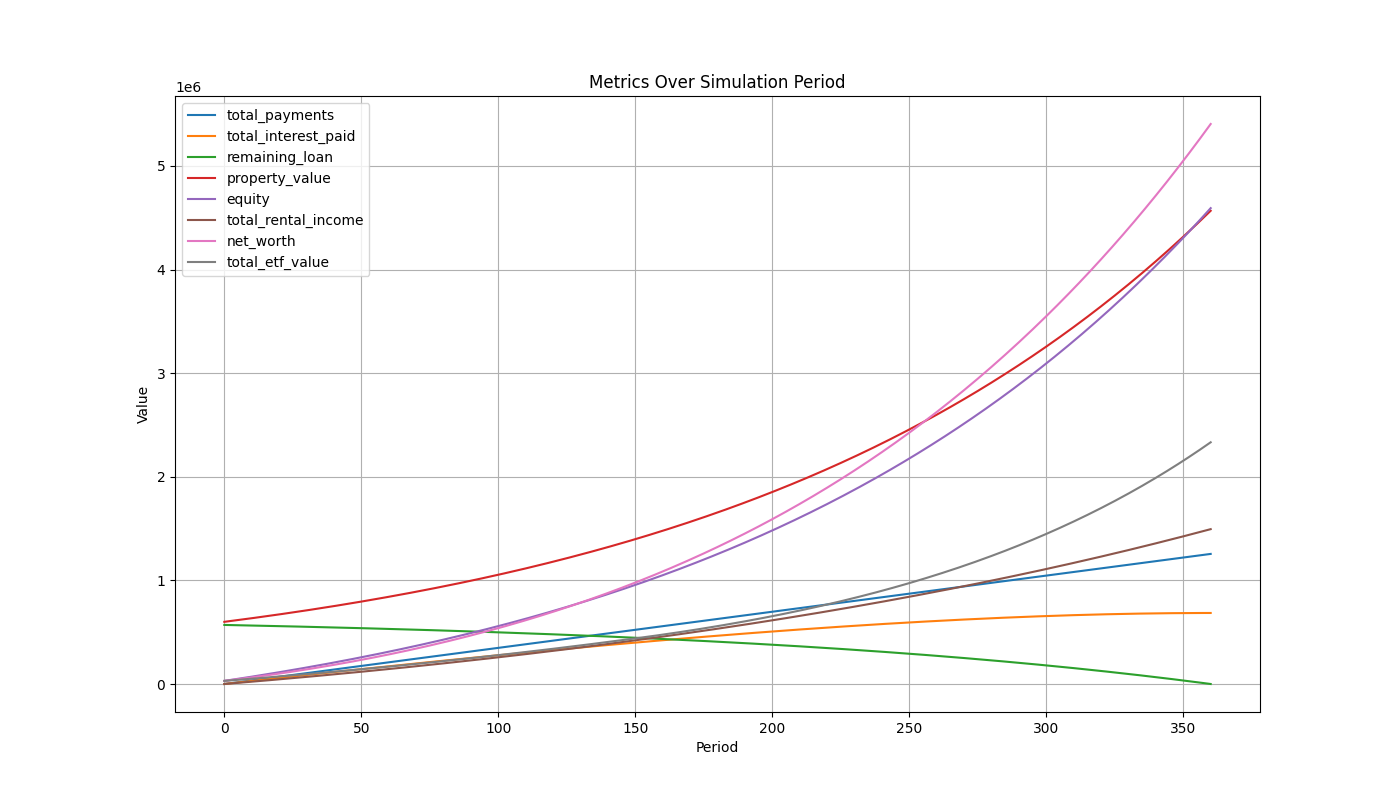

In [15]:
metric_configs = {
    **loan_metric_configs,
    **property_metric_configs,
    **income_metric_configs,
    **baseline_metric_configs
}

%matplotlib widget
simulate(TOTAL_LOAN_PERIODS, metric_configs)